In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
flipkart_df = pd.read_csv("Dataset-SA.csv",encoding="unicode_escape")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIVEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
flipkart_df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [3]:
flipkart_df.isnull().any()

product_name     False
product_price    False
Rate             False
Review            True
Summary           True
Sentiment        False
dtype: bool

In [4]:
flipkart_df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [5]:
flipkart_df.dropna(inplace=True)
flipkart_df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [6]:
import string
def remove_punc(text):
    punct = string.punctuation  
    return text.translate(str.maketrans('', '', punct)) 

In [7]:
flipkart_df['Summary'] = flipkart_df['Summary'].apply(lambda x: remove_punc(x))
flipkart_df['Review'] = flipkart_df['Review'].apply(lambda x: remove_punc(x))
flipkart_df['product_name'] = flipkart_df['product_name'].apply(lambda x: remove_punc(x))
flipkart_df['product_price'] = flipkart_df['product_price'].apply(lambda x: remove_punc(x))

In [8]:
flipkart_df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,super,great cooler excellent air flow and for this p...,positive
1,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,fair,ok ok product,neutral


In [9]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
flipkart_df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,super,great cooler excellent air flow and for this p...,positive
1,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,fair,ok ok product,neutral


In [10]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180379 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180379 non-null  object
 1   product_price  180379 non-null  object
 2   Rate           180379 non-null  object
 3   Review         180379 non-null  object
 4   Summary        180379 non-null  object
 5   Sentiment      180379 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [11]:
flipkart_df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,super,great cooler excellent air flow and for this p...,positive
1,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L RoomPersonal Air CoolerWhite Black...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow,awesome product,positive


In [12]:
flipkart_df.shape

(180379, 6)

In [13]:
pd.set_option('display.max_colwidth', 200)

flipkart_df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,5,super,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,3,fair,the quality is good but the power of air is decent,positive
3,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,3,fair,ok ok product,neutral


In [14]:
#importing all the nlp packages
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

tokenizer = TreebankWordTokenizer()
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VIVEK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIVEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIVEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIVEK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Filter the reviews by removing punctuations, stopwords, lemmatizing, and stemming
corpus = []  # creating an empty list
for i in range(len(flipkart_df.Review)):
    text = flipkart_df.Review.iloc[i].lower()  # Use .iloc for positional indexing
    text = re.sub('[^a-z0-9]', ' ', text)  # Replace non-alphanumeric characters with space
    tokens = tokenizer.tokenize(text)  # Tokenize the text
    filtered_tokens = [w for w in tokens if w not in stop_words]  # Remove stopwords
    filtered = [stemmer.stem(lemmatizer.lemmatize(w)) for w in filtered_tokens]  # Stem and lemmatize
    filtered_text = ' '.join(filtered)  # Join tokens into a single string
    corpus.append(filtered_text)  # Append the processed text to the corpus

In [16]:
'not' in stop_words

True

In [17]:
corpus[:5]

['super', 'awesom', 'fair', 'useless product', 'fair']

In [18]:
flipkart_df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,5,super,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,3,fair,the quality is good but the power of air is decent,positive
3,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L RoomPersonal Air CoolerWhite Black Elegant High SpeedHoney Comb Cooling Pad Ice Chamber Blower,3999,3,fair,ok ok product,neutral


In [19]:
# It is better for those adjectives that have 'not' before them, converted to new word
from nltk import bigrams, pos_tag, word_tokenize
s="Greg is not happy. He wasn't free last night. he was too busy"
wt=word_tokenize(s)
p = pos_tag(wt)
bg=bigrams(p)

for(w1,t1),(w2,t2) in bg:
    if ((w1.lower()=="n't") | (w1.lower()=='not')| (w1.lower()=='no'))&(t2[0]=='J'):
        print("not"+ w2)

nothappy
notfree


In [20]:
for(w1,t1),(w2,t2) in bg:
    print("*", end=" ")
    print(w1)

In [21]:
#Bag of Words (BoW) technique to convert corpus into X
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(corpus)

CountVectorizer()

In [22]:
#each word as feature and column index 
cv.vocabulary_

{'super': 965,
 'awesom': 100,
 'fair': 376,
 'useless': 1042,
 'product': 787,
 'highli': 494,
 'recommend': 822,
 'nice': 688,
 'unsatisfactori': 1031,
 'worth': 1097,
 'money': 660,
 'great': 452,
 'mindblow': 648,
 'purchas': 798,
 'brilliant': 158,
 'classi': 219,
 'must': 673,
 'buy': 178,
 'fabul': 371,
 'everi': 357,
 'penni': 740,
 'wow': 1100,
 'terrif': 992,
 'excel': 359,
 'simpli': 904,
 'wonder': 1089,
 'expect': 364,
 'better': 135,
 'good': 444,
 'qualiti': 804,
 'decent': 277,
 'satisfactori': 864,
 'wast': 1070,
 'best': 133,
 'job': 555,
 'pretti': 775,
 'cooler': 250,
 'worthless': 1099,
 'worst': 1096,
 'experi': 366,
 'ever': 356,
 'perfect': 745,
 'like': 591,
 'assembl': 88,
 'one': 709,
 'get': 438,
 '45k': 32,
 'cheap': 199,
 'slightli': 914,
 'disappoint': 306,
 'horribl': 499,
 'poor': 768,
 'realli': 817,
 'market': 618,
 'absolut': 49,
 'rubbish': 853,
 'okay': 706,
 'bad': 111,
 'delight': 286,
 'valueformoney': 1050,
 'choic': 210,
 'hate': 480,
 'terrib

In [23]:
#Total words in Vocabulary
len(cv.vocabulary_)

1114

In [24]:
features = list(cv.vocabulary_.keys())
features = sorted(features)
features[:10]

['10', '100', '1010', '10k', '10min', '11', '1100', '11th', '12', '150']

In [25]:
len(features)

1114

In [26]:
features[:50]

['10',
 '100',
 '1010',
 '10k',
 '10min',
 '11',
 '1100',
 '11th',
 '12',
 '150',
 '1599',
 '15k',
 '17',
 '1701mt',
 '18',
 '1832',
 '20',
 '2000',
 '2021',
 '20w',
 '23',
 '24',
 '24th',
 '25',
 '2k',
 '30',
 '300',
 '300mbp',
 '30th',
 '360',
 '3g',
 '3rd',
 '45k',
 '46',
 '4k',
 '50',
 '500',
 '60',
 '600',
 '61k',
 '63kjust',
 '678',
 '7000',
 '75',
 '7l',
 '8000',
 '9838797786',
 'a1',
 'aboveaverag',
 'absolut']

In [27]:
features[-10:]

['wrost', 'xiaomi', 'yaar', 'ye', 'year', 'yet', 'yield', 'yr', 'zero', 'zip']

In [28]:
len(features)

1114

In [29]:
#Transform text to matrix for further modelling
X = pd.DataFrame(cv.transform(corpus).toarray(),columns=features)
y = flipkart_df.Sentiment

In [30]:
X.shape

(180379, 1114)

In [31]:
pd.set_option('display.max_columns', 1600)
X.head()

,10,100,1010,10k,10min,11,1100,11th,12,150,1599,15k,17,1701mt,18,1832,20,2000,2021,20w,23,24,24th,25,2k,30,300,300mbp,30th,360,3g,3rd,45k,46,4k,50,500,60,600,61k,63kjust,678,7000,75,7l,8000,9838797786,a1,aboveaverag,absolut,ac,accept,achcha,act,advis,afford,aftersal,agaro,ah,ahead,air,alam,allergi,allus,almost,also,altern,alway,amaz,amazingli,among,amount,amp,amplifi,andor,anoth,ap,app,appear,appli,applianc,applic,appropri,aqi,aqua,area,around,ask,assembl,assist,audio,aura,auto,automat,av,avaiabl,avail,averag,avg,away,awesom,awesomebest,awesomenic,awesomevalu,awesomeveri,awsm,awsom,awwwwwwwwsom,b4,back,backup,bad,badli,bag,bahut,bajaj,bakcup,bakwa,balanc,ball,bank,bar,base,basic,bass,basslong,batteri,bcoz,beast,beauti,beginn,behavior,bella,best,bestm,better,bewar,beyond,bicycleworth,big,biggest,billion,bishnu,bit,black,block,blow,blowingsoni,bluetooth,bo,boat,bodi,borderless,bottl,bought,bowl,box,brand,brilliant,brilliantli,bring,broadband,broadbandtikonaloc,broke,broken,brond,bsnl,bt,budget,bug,buget,build,built,burn,burnt,busi,butter,butterfli,buy,buygo,buyinghigh,buypoor,cabl,came,camera,cannon,canon,cant,capabl,capac,cardtig,care,carri,cartridg,catvis,caveat,certainli,chang,charg,cheap,cheaper,cheat,cheatingflipkart,check,cheep,chepest,chimney,china,chines,chip,choic,choos,chop,chopper,chutney,cigarett,clarif,clariti,class,classi,clean,cleaner,clear,clock,color,colour,combo,come,comfort,commend,compact,compar,comparison,compat,complet,complex,compon,concis,condit,confid,connect,consid,consist,content,conveni,convent,convini,cook,cooker,cool,cooler,coolernot,cost,costli,could,couldnt,courier,cover,covid,crack,crap,crash,crisp,crockeri,crompton,crt,custom,cut,cycl,daili,damag,danger,data,day,dcd9000x,dead,deal,decent,decid,decor,deep,deepawali,defect,delay,delhi,delhiveri,delight,deliv,deliveri,demo,descent,describ,descript,desert,deserv,design,detail,detect,deterg,devic,differ,dime,dina,dinner,dir615,disapoint,disappoint,discount,discret,dish,dishwash,display,disspoint,diy,dlink,doesnt,dont,door,doubt,dream,dri,drive,driver,dryiron,dslr,due,dulcet,durabl,dust,dx,earli,earlier,earn,easi,eb1100,econom,edg,edit,effect,effici,ek,elast,electr,eleg,engin,enhanc,enjoy,enough,entri,entrylevel,envi,environ,eseti,essenti,eureka,even,ever,everi,exactli,excel,except,exchang,execl,exhaust,expect,expens,experi,explain,express,extrem,fab,fabul,fabulousawesom,fabulousi,face,faililng,fair,fake,fals,famili,fan,fanci,fantast,far,fast,faulti,favourit,featur,feedback,feel,ff,fhd,fiber,filipkart,filpkart,filter,find,fine,finish,fire,first,fit,five,fix,flask,flip,flipcart,flipkart,flipkartthi,floor,flop,follow,food,fool,footbal,forb,form,fortun,fot,four,fp,free,fridg,friend,friendli,fruit,full,function,furnitur,fx,fx1,fx11,fx7,gadget,game,gener,genuin,genuni,get,gift,give,given,go,gone,good,goodgo,goodreat,goodsel,goodwil,googl,gorgeou,got,great,greatmust,grey,grind,grinder,griptough,ground,guard,gud,gut,guy,gx,gx1,habit,hai,half,hand,handi,handili,handl,hang,happi,hard,harddisk,hardground,hardwar,haresh,hat,hate,hatsoff,hdmi,head,headphon,health,heart,heat,heavi,height,hero,hi,hidden,high,highli,hindwar,home,honest,hope,horribl,host,hostel,hot,hour,household,hp,hr,huge,hurri,hurt,i5,ideal,ifb,im,impress,improp,improv,inalsa,includ,incomplet,increas,indian,industri,info,initi,ink,inkjet,inmix,innov,input,insan,insid,instal,install,insur,intellig,interfac,internet,invert,invertor,invest,investmentful,invetor,invoic,ip,iron,irrit,issa,issu,issueappl,item,itsecond,jar,jh,jio,job,juic,juicer,kajal,kam,kart,keep,kent,kettl,kettle15,keyboard,kid,kind,kinda,kit,kitchen,lag,lakm,laptop,larg,last,late,later,le,lead,leak,leather,leg,length,lenovo,level,lg,lie,life,light,lightweight,like,line,link,liter,littl,live,livepur,livpur,long,longer,look,loooong,lot,love,low,lowest,luxuri,lw,m1,machin,made,maid,main,make,man,manual,mark,market,marvel,mass,mat,match,mate,materi,max,maximum,may,mbp,mean,mechan,medicin,medium,meet,melodi,mention,met,mi,mi2airpurifi,mic

In [32]:
'good' in X.columns

True

In [33]:
corpus[:5]

['super', 'awesom', 'fair', 'useless product', 'fair']

In [34]:
X.iloc[0,:].sum() # The first review has 1 word

1

In [35]:
X

10  100  1010  10k  10min  11  1100  11th  12  150  1599  15k  17  \
0        0    0     0    0      0   0     0     0   0    0     0    0   0   
1        0    0     0    0      0   0     0     0   0    0     0    0   0   
2        0    0     0    0      0   0     0     0   0    0     0    0   0   
3        0    0     0    0      0   0     0     0   0    0     0    0   0   
4        0    0     0    0      0   0     0     0   0    0     0    0   0   
...     ..  ...   ...  ...    ...  ..   ...   ...  ..  ...   ...  ...  ..   
180374   0    0     0    0      0   0     0     0   0    0     0    0   0   
180375   0    0     0    0      0   0     0     0   0    0     0    0   0   
180376   0    0     0    0      0   0     0     0   0    0     0    0   0   
180377   0    0     0    0      0   0     0     0   0    0     0    0   0   
180378   0    0     0    0      0   0     0     0   0    0     0    0   0   

        1701mt  18  1832  20  2000  2021  20w  23  24  24th  25  2k  30  300  \
0            0   0     0   0     0     0    0   0   0     0   0   0   0    0   
1            0   0     0   0     0     0    0   0   0     0   0   0   0    0   
2            0   0     0   0     0     0    0   0   0     0   0   0   0    0   
3            0   0     0   0     0     0    0   0   0     0   0   0   0    0   
4            0   0     0   0     0     0    0   0   0     0   0   0   0    0   
...        ...  ..   ...  ..   ...   ...  ...  ..  ..   ...  ..  ..  ..  ...   
180374       0   0     0   0     0     0    0   0   0     0   0   0   0    0   
180375       0   0     0   0     0     0    0   0   0     0   0   0   0    0   
180376       0   0     0   0     0     0    0   0   0     0   0   0   0    0   
180377       0   0     0   0     0     0    0   0   0     0   0   0   0    0   
180378       0   0     0   0     0     0    0   0   0     0   0   0   0    0   

        300mbp  30th  360  3g  3rd  45k  46  4k  50  500  60  600  61k  \
0            0     0    0   0    0    0   0   0   0    0   0    0    0   
1            0     0    0   0    0    0   0   0   0    0   0    0    0   
2            0     0    0   0    0    0   0   0   0    0   0    0    0   
3            0     0    0   0    0    0   0   0   0    0   0    0    0   
4            0     0    0   0    0    0   0   0   0    0   0    0    0   
...        ...   ...  ...  ..  ...  ...  ..  ..  ..  ...  ..  ...  ...   
180374       0     0    0   0    0    0   0   0   0    0   0    0    0   
180375       0     0    0   0    0    0   0   0   0    0   0    0    0   
180376       0     0    0   0    0    0   0   0   0    0   0    0    0   
180377       0     0    0   0    0    0   0   0   0    0   0    0    0   
180378       0     0    0   0    0    0   0   0   0    0   0    0    0   

        63kjust  678  7000  75  7l  8000  9838797786  a1  aboveaverag  \
0             0    0     0   0   0     0           0   0            0   
1             0    0     0   0   0     0           0   0            0   
2             0    0     0   0   0     0           0   0            0   
3             0    0     0   0   0     0           0   0            0   
4             0    0     0   0   0     0           0   0            0   
...         ...  ...   ...  ..  ..   ...         ...  ..          ...   
180374        0    0     0   0   0     0           0   0            0   
180375        0    0     0   0   0     0           0   0            0   
180376        0    0     0   0   0     0           0   0            0   
180377        0    0     0   0   0     0           0   0            0   
180378        0    0     0   0   0     0           0   0            0   

        absolut  ac  accept  achcha  act  advis  afford  aftersal  agaro  ah  \
0             0   0       0       0    0      0       0         0      0   0   
1             0   0       0       0    0      0       0         0      0   0   
2             0   0       0       0    0      0       0         0      0   0   
3             0   0       0       0 

In [36]:
cv.vocabulary_["superb"]# index of "superb" in columns

966

In [37]:
#or
cv.vocabulary_["love"]

604

### Since we converted our unstructured dataset to structured dataset we can apply any classification algorithm for prediction

Now we can use a classification model to classify text. Validation of the model

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0)

In [39]:
#step1: importing calssifier
from sklearn.linear_model import LogisticRegression
#step2: creating an instance from that classifier
model = LogisticRegression()
#step3 : train the model(fit on train dataset)
model.fit(X_train,y_train)
#step4: prediction 
#step5: evaluation
model.score(X_test,y_test)

0.91036700299368

**The Model has an overall accuracy of 91.03% in predicting whether a review is positive or negative**

In [40]:
flipkart_df.iloc[X_test.index[:5],:]

,product_name,product_price,Rate,Review,Summary,Sentiment
86700,Prestige Plus Atlas 750 W Juicer Mixer Grinder 4 Jars Blue White,3249,2,slightly disappointed,motor stopped working within 2 months using i dont even use that regular i hardly used it 78 times total in those two months bought it after reading lots of review but this one failed to meet the ...,negative
190218,LS2821 Bleed Blue Day and Date Functioning Strap Adult Quartz Analog Watch For Men,299,5,not specified,good product,positive
180578,MILTON Thermosteel Flip Lid 500 ml FlaskPack of 1 Silver Steel,648,5,excellent,nice,positive
28056,PRAGATI TRENDS Lab CoatPoly Cotton,385,5,must buy,true to size good quality fabric,positive
37423,Adrenex by Flipkart Drift 100BK Quad Roller Skates Size 17 UKBlack,809,5,perfect product,its really strong and durable one i brought it for 13 year old boy but i think its suitable for 8 to 16 years boys and girls,positive


In [41]:
y_pred = model.predict(X_test)
y_pred[:5]

array(['negative', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

In [42]:
flipkart_df.iloc[X_test.index[-5:],:]

,product_name,product_price,Rate,Review,Summary,Sentiment
86628,Prestige Plus Atlas 750 W Juicer Mixer Grinder 4 Jars Blue White,3249,1,utterly disappointed,very poor experience mixer motor broken inside how is it possible,negative
156625,LA VERNE Microfibre Stripes Cushion Pack of 3White,379,4,wonderful,value for money,positive
32117,Mylab CoviSelf COVID19 Rapid COVID19 Rapid Antigen Kit Homebasedself,125,5,highly recommended,good,positive
182455,Aero Seeds 40 Varieties of Flower Combo Pack Seed2050 per packet,194,5,excellent,wonderful just need a good soil cocopeat and some fertilizer i just grew them in random soil still they grow very well in dec i sow them and in feb they started flowering even i was not there to t...,positive
161886,chawla overseas Red Cotton Carpet152 cm X 214 cm Rectangle,361,3,just okay,fare,neutral


In [43]:
y_pred[-5:]

array(['negative', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

In [44]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.76      0.80      6036
     neutral       0.50      0.00      0.00      2198
    positive       0.92      0.99      0.95     36861

    accuracy                           0.91     45095
   macro avg       0.76      0.58      0.59     45095
weighted avg       0.89      0.91      0.89     45095



In [45]:
flipkart_df.Sentiment.value_counts()

Sentiment
positive    147171
negative     24401
neutral       8807
Name: count, dtype: int64

# Deployment of the model

In order to test on new reviews we will have to transform the review to matrix as well using our BoW transformer. 

In [46]:
review = ['good product', 'bad', 'very fast']

In [47]:
#model.fit(X,y)
model.predict(cv.transform(review).toarray())

C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['positive', 'negative', 'positive'], dtype=object)

### so we predicted the 1st and the 3rd customers are satisfied, but the 2nd customers is not satsfied 

# We can use TF-IDF instead of BoW for the transformation of text to matrix

In [48]:
#TF-IDF technique to convert corpus into X
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(corpus)
features = list(tfidf.vocabulary_.keys())
features = sorted(features)
X = pd.DataFrame(tfidf.transform(corpus).toarray(),columns=features)
y = flipkart_df.Sentiment

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state =0)

model2 = LogisticRegression()

model2.fit(X_train, y_train)

print("Accuracy of TFIDF Model", model2.score(X_test, y_test))
    

Accuracy of TFIDF Model 0.910167424326422


In [50]:
y_pred2 = model2.predict(X_test)

print("classification_report - TFIDF Model")
print(classification_report(y_test, y_pred2))


classification_report - TFIDF Model


C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.86      0.76      0.80      6100
     neutral       0.00      0.00      0.00      2202
    positive       0.92      0.99      0.95     36793

    accuracy                           0.91     45095
   macro avg       0.59      0.58      0.59     45095
weighted avg       0.86      0.91      0.89     45095



C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


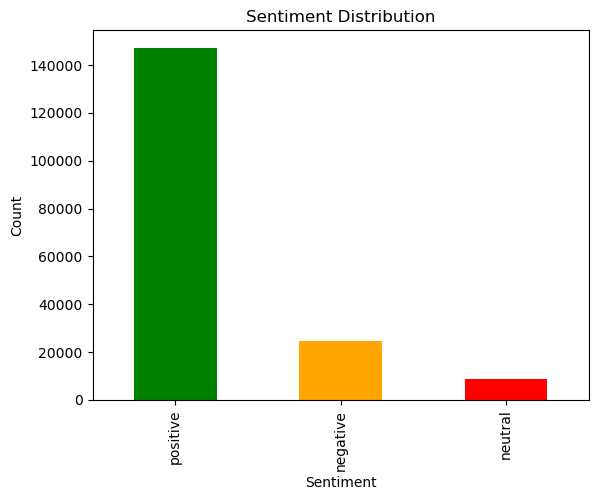

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame with sentiment categories
sentiment_counts = flipkart_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [54]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


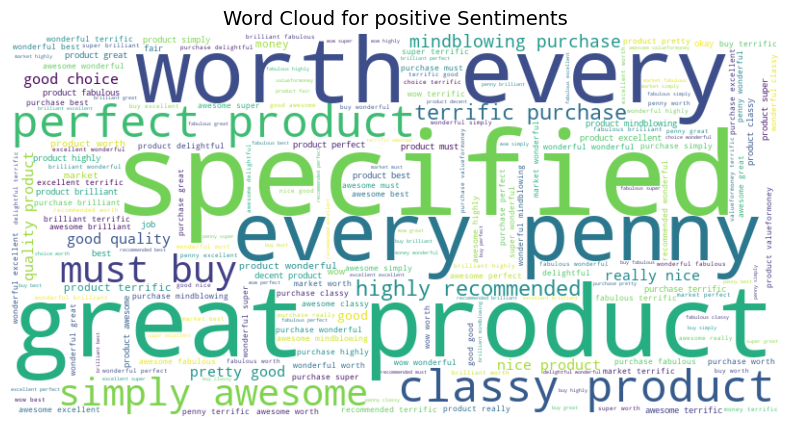

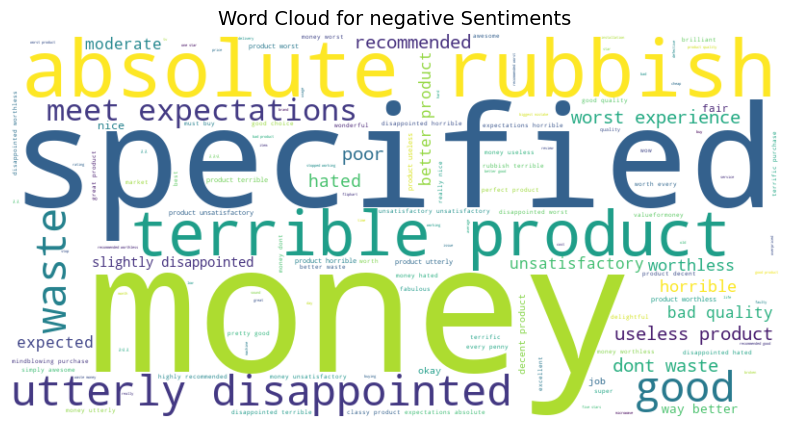

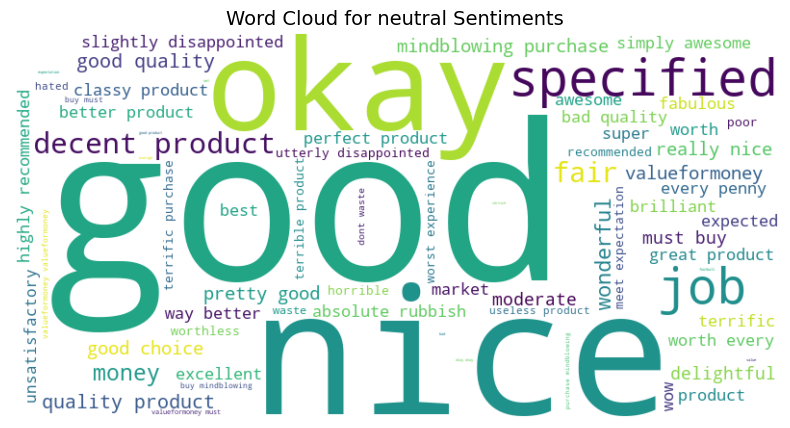

In [57]:
from wordcloud import WordCloud

# Function to generate and display word clouds
def generate_wordcloud(sentiment):
    text = ' '.join(flipkart_df[flipkart_df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiments", fontsize=14)
    plt.show()

# Generate for each sentiment
for sentiment in flipkart_df['Sentiment'].unique():
    generate_wordcloud(sentiment)


In [68]:
# Convert to numeric, replacing non-convertible values with NaN
flipkart_df['Rate'] = pd.to_numeric(flipkart_df['Rate'], errors='coerce')

# Fill NaN values with a default value (e.g., 0) and convert to int
flipkart_df['Rate'] = flipkart_df['Rate'].fillna(0).astype(int)

print(flipkart_df['Rate'])


0         5
1         5
2         3
3         1
4         3
         ..
205047    5
205048    5
205049    3
205050    5
205051    4
Name: Rate, Length: 180379, dtype: int32


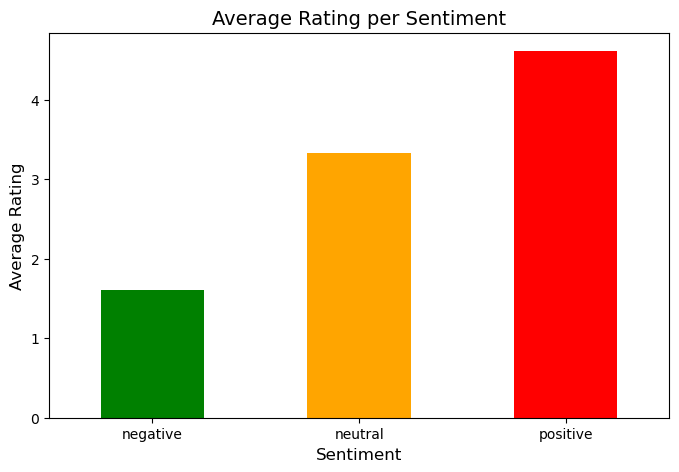

In [69]:
# Calculate average rating per sentiment
avg_rating = flipkart_df.groupby('Sentiment')['Rate'].mean()

# Plot the average ratings
avg_rating.plot(kind='bar', color=['green', 'orange', 'red'], figsize=(8, 5))
plt.title("Average Rating per Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=0)
plt.show()
